# Clusters

To avoid memory leak problems with the MKL library (which is used by KMeans) on Windows, set environment variable OMP_NUM_THREADS to 1:

In [1]:
%env OMP_NUM_THREADS=1

env: OMP_NUM_THREADS=1


This needs to be done before `from sklearn.cluster import KMeans`. Don't ask me why or how this works, found the solution from two different StackExchange posts.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
from sklearn.cluster import KMeans
from sklearn import datasets

In [4]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [5]:
estimators = [("k_means_iris_8", KMeans(n_clusters=8, n_init="auto")),
              ("k_means_iris_3", KMeans(n_clusters=3, n_init="auto"))]

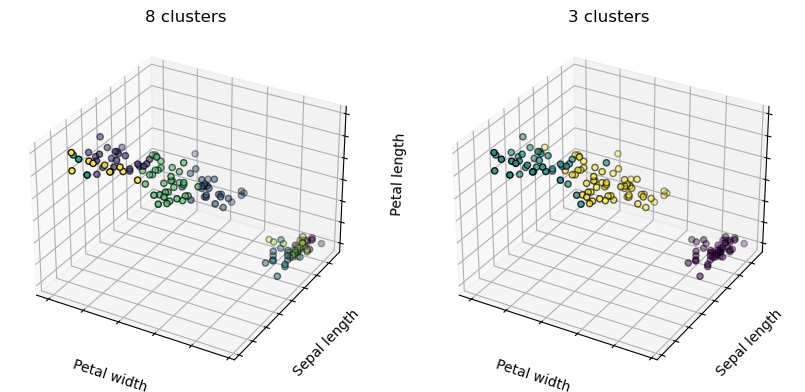

In [6]:
fig = plt.figure(figsize=(10,8))
titles = ["8 clusters", "3 clusters"]
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(1, 2, idx + 1, projection="3d", elev=30, azim=120)
    est.fit(x)
    labels = est.labels_
    ax.scatter(x[:, 3], x[:, 0], x[:, 2], c=labels.astype(float), edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("Petal width")
    ax.set_ylabel("Sepal length")
    ax.set_zlabel("Petal length")
    ax.set_title(title)

## Mean-Shift

In [7]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from PIL import Image

In [8]:
image_toy = Image.open("cluster_meanshift_toystory.jpg")
image_toy = np.array(image_toy)

In [9]:
x = image_toy.shape[0]
y = image_toy.shape[1]
x, y

(402, 715)

In [10]:
imageSimpleArray = np.reshape(image_toy, [-1, 3])
imageSimpleArray.shape

(287430, 3)

In [11]:
bandwidth = estimate_bandwidth(imageSimpleArray, n_samples=500, quantile=0.1)
bandwidth

37.37539332768012

In [12]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(imageSimpleArray)
labels = ms.labels_
centerClusters = ms.cluster_centers_
unique_labels = np.unique(labels) # Remove a repetição de labels para saber a quantidade final de grupos
numberClusters = len(unique_labels)
print('Número de clusters:', numberClusters)

Número de clusters: 8


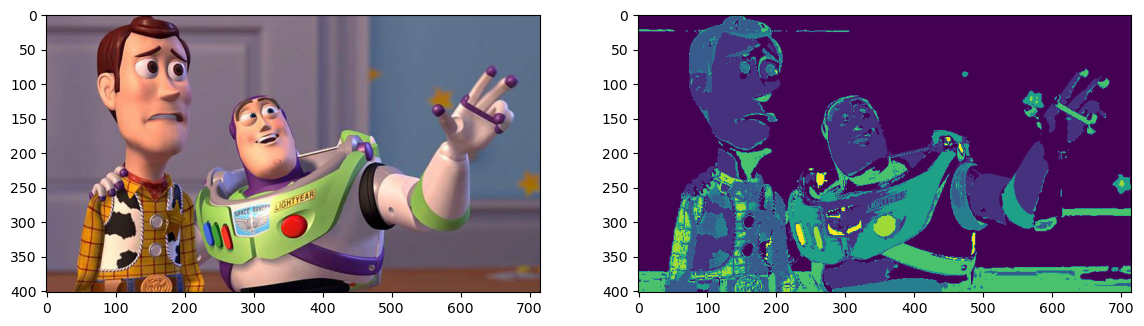

In [13]:
plt.figure(1, figsize = (14, 8))
plt.subplot(1, 2, 1)
plt.imshow(image_toy)
plt.subplot(1, 2, 2)
plt.imshow(np.reshape(labels, [x, y]))
plt.show()